    Accuracy      Speed    Stamina  Age
0  68.727006  27.290072  96.330635   31
1  97.535715  27.712703  69.582476   23
2  86.599697  20.740447  65.795795   23
3  79.932924  23.584657  79.578110   30
4  57.800932  21.158691  99.426018   36

Missing values in dataset:
Accuracy    0
Speed       0
Stamina     0
Age         0
dtype: int64


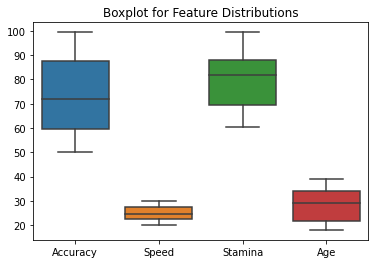


Accuracy without outliers: 1.0
Accuracy with outliers: 1.0


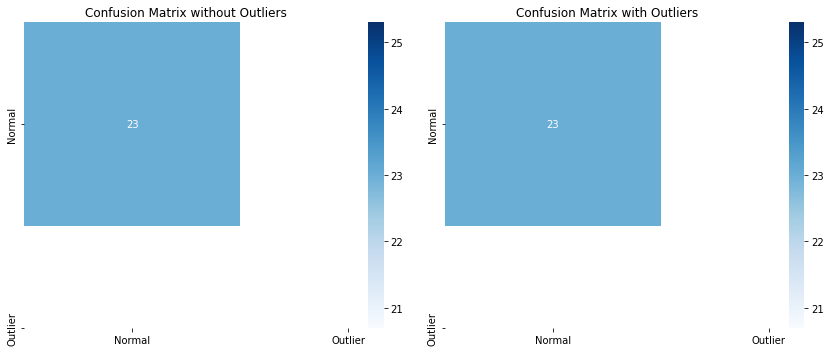

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv("player_stats.csv")

# Explore the first few rows of the dataset
print(data.head())

# Step 2: Check for missing values and handle them (optional)
print("\nMissing values in dataset:")
print(data.isnull().sum())

# Drop rows with missing values (if any)
data.dropna(inplace=True)

# Step 3: Outlier Detection (Z-Score Method)
from scipy.stats import zscore

# Calculate Z-scores
z_scores = np.abs(zscore(data[['Accuracy', 'Speed', 'Stamina', 'Age']]))
outliers = (z_scores > 3).all(axis=1)  # Any row with all features > 3 standard deviations

# Add a column to mark outliers
data['outlier'] = outliers

# Visualizing outliers
sns.boxplot(data=data[['Accuracy', 'Speed', 'Stamina', 'Age']])
plt.title("Boxplot for Feature Distributions")
plt.show()

# Step 4: Split the dataset into features (X) and target (y)
X = data[['Accuracy', 'Speed', 'Stamina', 'Age']]
y = data['outlier']  # For simplicity, let's predict if a player is an outlier or not

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Scale features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Build KNN Model without outliers (For comparison)
knn_no_outliers = KNeighborsClassifier(n_neighbors=3)
knn_no_outliers.fit(X_train_scaled, y_train)

# Step 8: Make predictions and evaluate the model
y_pred_no_outliers = knn_no_outliers.predict(X_test_scaled)

# Accuracy and confusion matrix
accuracy_no_outliers = accuracy_score(y_test, y_pred_no_outliers)
cm_no_outliers = confusion_matrix(y_test, y_pred_no_outliers)

# Step 9: Build KNN Model with outliers
# Add outliers back into the training set
X_train_outliers = X_train_scaled  # Use the scaled features including outliers
X_test_outliers = X_test_scaled

knn_with_outliers = KNeighborsClassifier(n_neighbors=3)
knn_with_outliers.fit(X_train_outliers, y_train)

# Step 10: Make predictions with outliers and evaluate
y_pred_with_outliers = knn_with_outliers.predict(X_test_outliers)

# Accuracy and confusion matrix
accuracy_with_outliers = accuracy_score(y_test, y_pred_with_outliers)
cm_with_outliers = confusion_matrix(y_test, y_pred_with_outliers)

# Step 11: Compare the results
print("\nAccuracy without outliers:", accuracy_no_outliers)
print("Accuracy with outliers:", accuracy_with_outliers)

# Plot the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_no_outliers, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Outlier'], yticklabels=['Normal', 'Outlier'], ax=ax[0])
ax[0].set_title("Confusion Matrix without Outliers")

sns.heatmap(cm_with_outliers, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Outlier'], yticklabels=['Normal', 'Outlier'], ax=ax[1])
ax[1].set_title("Confusion Matrix with Outliers")

plt.tight_layout()
plt.show()
